## Machine Learning

### KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

group, labels = createDataSet()
plt.scatter(group[:, 0], group[:, 1])
plt.show()

#### Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(group, labels)

test_data = np.array([0.8, 0.9])
knn.predict([test_data])


In [2]:
x = 1
i = 1
while i <= 128:
    i += i
    x += x
print(x)

256


#### 示例：手写数字识别

In [ ]:
import os

train_ds_path = 'Ch02/trainingDigits/'
test_ds_path = 'Ch02/testDigits/'

def image2vector(f_path):
    v = []
    with open(f_path, 'r') as f:
        for i in range(32):
            line = f.readline().strip()
            v.extend([int(digit) for digit in list(line)])
    return v

def get_dataset(ds_path):
    file_names = os.listdir(ds_path)
    labels = []
    features = []
    for f_name in file_names:
        labels.append(int(f_name.split('_')[0]))
        features.append(image2vector(os.path.join(ds_path, f_name)))
    return np.array(features), np.array(labels)

In [ ]:
train_features, train_labels = get_dataset(train_ds_path)
test_features, test_labels = get_dataset(test_ds_path)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)

In [ ]:
acc = sum(knn.predict(test_features) == test_labels) / len(test_labels)
print('Accuracy: ', acc)

### 决策树

In [ ]:
import numpy as np

def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    #change to discrete values
    return dataSet, labels


In [ ]:
import numpy as np
import operator

def calcShannonEnt(dataset):  # 计算熵值(数据类别越多，越混乱，熵值越高)
    numFeatures = len(dataset)
    labelCounts = {}
    for featVec in dataset:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    ent = 0
    for key in labelCounts:
        prob = float(labelCounts[key] / numFeatures)
        ent -= prob * np.log2(prob)
    return ent

def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy  # 计算信息熵增益（越大说明数据的无序程度减小，即划分的越合理）
        if (infoGain > bestInfoGain):  # bestFeature初始化为-1(<0)
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature                      #returns an integer

def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),
                               key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]#stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree                            
    

In [ ]:
dataset, labels = createDataSet()
calcShannonEnt(dataset)

In [ ]:
# 使用sklearn库函数是实现决策树算法
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def process_data(dataset):
    features = []
    labels = []
    i = 0
    for data in dataset:
        features.append(data[:2])
        labels.append(data[2])
    return features, labels

dataset, desc = createDataSet()
features, labels = process_data(dataset)
# print(features, labels)
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(features, labels)

In [ ]:
tree.plot_tree(classifier)

In [ ]:
test_data = [1, 1]
classifier.predict([test_data])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
le = LabelEncoder()
le.fit_transform(['aaa', 'bbb', 'eee', 'ddd']).tolist()
ohe = OneHotEncoder()
ohe.fit_transform(np.array(['aaa', 'bbb', 'eee', 'ddd']).reshape(-1, 1)).toarray()

In [ ]:
# 示例：使用决策树预测隐形眼镜类型
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

num_lines = 24
num_features = 4
f_path = 'Ch03/lenses.txt'

def get_dataset():
    features = [''] * num_lines
    labels = [''] * num_lines
    with open(f_path, 'r') as f:
        for i in range(num_lines):
            line_l = f.readline().strip().split('\t')
            features[i] = line_l[:-1]
            labels[i] = line_l[-1]
    features = np.array(features)
    labels = np.array(labels)
    return features, labels

def get_feature_description_list(features):
    feature_des = [''] * num_features
    for i in range(num_features):
        feature_des[i] = np.sort(np.unique(features[:, i])).tolist()
    return feature_des

def feature_encoding(features, feature_des):
    if len(features.shape) > 1:
        numeric_features = np.zeros_like(features, dtype=np.uint8)
        rows, cols = features.shape
        for r in range(rows):
            for c in range(cols):
                numeric_features[r, c] = feature_des[c].index(features[r][c])
    else:
        cols = features.shape[0]
        numeric_features = np.zeros((1, cols), dtype=np.uint8)
        for c in range(cols):
                numeric_features[0, c] = feature_des[c].index(features[c])
    return numeric_features

features, labels = get_dataset()
feature_des = get_feature_description_list(features)
numeric_features = feature_encoding(features, feature_des)
# print(numeric_features, feature_des, labels)
classifier = DecisionTreeClassifier(max_depth=num_features)
classifier.fit(numeric_features, labels)

In [ ]:
tree.plot_tree(classifier)

In [ ]:
test_data = np.array(['pre', 'hyper', 'yes', 'normal'])
numeric_test_data = feature_encoding(test_data, feature_des)
classifier.predict(numeric_test_data)

### 朴素贝叶斯

In [ ]:
def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]    #1 is abusive, 0 not
    return postingList,classVec

def createVocabList(dataSet):
    vocabSet = set([])  #create empty set
    for document in dataSet:
        vocabSet = vocabSet | set(document) #union of the two sets
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else:
            print(f"word \'{word}\' is not in vocabList")
    return returnVec

def trainNB0(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = np.sum(trainCategory)/float(numTrainDocs)
    p0Num = np.ones(numWords); p1Num = np.ones(numWords)      #change to ones() 
    p0Denom = 2.0; p1Denom = 2.0                        #change to 2.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += np.sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += np.sum(trainMatrix[i])
    p1Vect = np.log(p1Num/p1Denom)
    p0Vect = np.log(p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = np.sum(vec2Classify * p1Vec) + np.log(pClass1)    #element-wise mult
    p0 = np.sum(vec2Classify * p0Vec) + np.log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: 
        return 0
    
def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    p0V,p1V,pAb = trainNB0(np.array(trainMat),np.array(listClasses))
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry = ['stupid', 'garbage']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))

def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec


In [ ]:
testingNB()

In [ ]:
listOPosts,listClasses = loadDataSet()
myVocabList = createVocabList(listOPosts)
[bagOfWords2VecMN(myVocabList, postinDoc) for postinDoc in listOPosts]

In [ ]:
# 使用sklearn实现示例：使用朴素贝叶斯过滤垃圾邮件
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB  # 二分类器

def data_processing():
    """数据预处理"""
    spam_path = '../Ch04/email/spam/'
    ham_path = '../Ch04/email/ham/'
    labels = []
    spam_f_paths = []; ham_f_paths = []
    vectorizer = CountVectorizer(input='filename', encoding='ISO-8859-1',
                                  token_pattern=r"\b\w{3,}\b")
    for f_name in os.listdir(spam_path):
        spam_f_paths.append(os.path.join(spam_path, f_name))
        labels.append(1)
    for f_name in os.listdir(ham_path):
        ham_f_paths.append(os.path.join(ham_path, f_name))
        labels.append(0)
    features = vectorizer.fit_transform([*spam_f_paths, *ham_f_paths])
    labels = np.array(labels)
    return features, labels, vectorizer

def text_encoding(f_path, vectorizer):
    """文件文本编码"""
    if type(f_path) == str:
        return vectorizer.transform([f_path])
    return vectorizer.transform(f_path)

In [ ]:
features, labels, vectorizer = data_processing()
classifierNB = BernoulliNB()
classifierNB.fit(features, labels)

In [ ]:
# 模型测试
test_data_file = ['Ch04/email/test/spam.txt', 'Ch04/email/test/ham.txt']
classifierNB.predict(text_encoding(test_data_file, vectorizer))

### Logistic回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -100, 100
num_steps = 1000
x = np.linspace(x_min, x_max, num_steps)
y = 1 / (1 + np.exp(-x))  # sigmoid function -> step fuction

plt.plot(x, y)
plt.show()

In [ ]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('Ch05/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    dataMat = np.array(dataMat)
    labelMat = np.array(labelMat)
    return dataMat,labelMat

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def gradAscent(dataMatIn, classLabels, alpha=0.001, maxCycles=500):
    """梯度上升算法，将所有数据与weight相乘然后求误差并进行梯度上升"""
    dataMatrix = np.np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = dataMatrix.shape
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [ ]:
def plotBestFit(dataMat, labelMat, weights):
    dataMat, labelMat = loadDataSet()
    plt.figure()
    plt.scatter(dataMat[labelMat == 1, 1], dataMat[labelMat == 1, 2], marker='o', color='r', label='class 1')
    plt.scatter(dataMat[labelMat == 0, 1], dataMat[labelMat == 0, 2], marker='s', color='b', label='class 0')
    line_x = np.arange(-3.0, 3.0, 0.1)
    if len(weights.shape) == 1:
        line_y = (-weights[0] - weights[1] * line_x) / weights[2]
    else:
        line_y = (-weights[0, 0] - weights[1, 0] * line_x) / weights[2, 0]

    plt.plot(line_x, line_y)
    plt.xlabel('X1')
    plt.xlabel('X2')
    plt.legend()
    plt.show()

In [ ]:
dataMat, labelMat = loadDataSet()
weights = gradAscent(dataMat, labelMat)
plotBestFit(dataMat, labelMat, weights)

In [ ]:
def stocGradAscent0(dataMatrix, classLabels, alpha=0.01):
    """随机梯度上升算法（一轮），遍历每个数据分别与weight相乘，然后误差累计求和，并进行梯度上升"""
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(np.sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [ ]:
weights = stocGradAscent0(dataMat, labelMat)
plotBestFit(dataMat, labelMat, weights)

In [ ]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    """随机梯度上升算法改进（numIter轮）"""
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):  # 随机（不重复，也不漏掉）取原数据中的每一行都进行梯度上升计算
            alpha = 4/(10.0+j+i)+0.001    #apha decreases with iteration, does not 
            randIndex = int(np.random.uniform(0,len(dataIndex)))  # 均匀分布
            h = sigmoid(np.sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [ ]:
weights = stocGradAscent1(dataMat, labelMat)
plotBestFit(dataMat, labelMat, weights)

In [ ]:
# 示例：从疝气病症预测病马的死亡率
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

def feature_encoding(is_train=True):
    trainingSet = []; trainingLabels = []
    if is_train:
        f_path = 'Ch05/horseColicTraining.txt'
    else:
        f_path = 'Ch05/horseColicTest.txt'
    frTrain = open(f_path)  # 已经处理过的训练数据（缺失值用0补充）
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))  # label
    return trainingSet, trainingLabels

def colicTest():
    trainingSet, trainingLabels = feature_encoding(True)
    testSet, testLabels = feature_encoding(False)
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0
    for i in range(len(testSet)):
        numTestVec += 1
        if int(classifyVector(np.array(testSet[i]), trainWeights))!= int(testLabels[i]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print(f"the error rate of this test is: {errorRate}")
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print(f"after {numTests} iterations the average error rate is: {errorSum/float(numTests)}")
        

In [ ]:
multiTest()

In [ ]:
# 使用sklearn实现logistic回归算法
from sklearn.linear_model import LogisticRegression

trainingSet, trainingLabels = feature_encoding(True)
testSet, testLabels = feature_encoding(False)
# 创建一个LogisticRegression对象，并设置solver参数为'sag'
lr = LogisticRegression(solver='sag', max_iter=2000)
# 使用训练集和标签拟合模型
lr.fit(trainingSet, trainingLabels)
testSet = np.array(testSet)
testLabels = np.array(testLabels)
# 预测新数据点的标签
predictedLabels = lr.predict(testSet)
print(f'accuracy={np.sum(predictedLabels == testLabels) / len(testLabels)}')


### 支持向量机（SVM）

In [2]:
import numpy as np
from utils import *

def selectJrand(i,m):
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(np.random.uniform(0, m))
    return j

def clipAlpha(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = np.mat(dataMatIn); labelMat = np.mat(classLabels).transpose()
    b = 0; m,n = np.shape(dataMatrix)
    alphas = np.mat(np.zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print(f"iter: {iter} i: {i}, pairs changed {alphaPairsChanged}")
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print(f"iteration number: {iter}")
    return b,alphas

def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = np.shape(X)
    K = np.mat(np.zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = np.exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = np.shape(dataMatIn)[0]
        self.alphas = np.mat(np.zeros((self.m,1)))
        self.b = 0
        self.eCache = np.mat(np.zeros((self.m,2))) #first column is valid flag
        self.K = np.mat(np.zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)
        
def calcEk(oS, k):
    fXk = float(np.multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = np.nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
        
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print("L==H"); return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print("eta>=0"); return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0



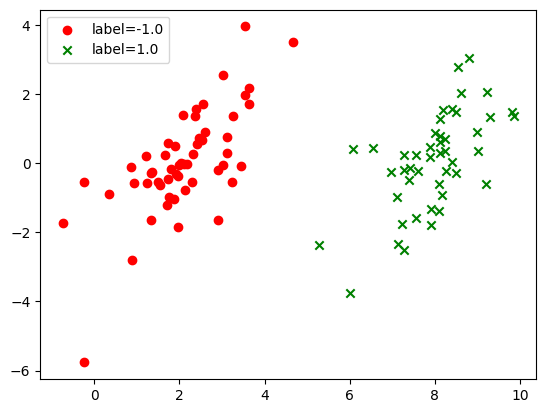

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\pytorch\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [5]:
dataArr,labelArr = load_dataset('Ch06/testSet.txt')
plot_scatter(dataArr, labelArr)

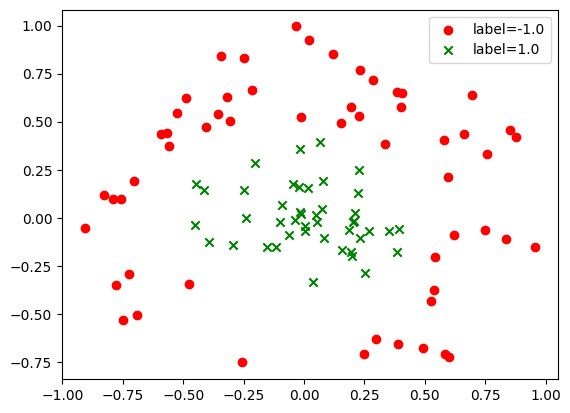

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\pytorch\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [4]:
dataArr,labelArr = load_dataset('Ch06/testSetRBF.txt')
plot_scatter(dataArr, labelArr)

#### Sklearn

In [2]:
# 使用sklearn库函数实现svm分类器，并进行训练
from sklearn import svm
from utils import *

svm_linear = svm.SVC()  # 线性分类器
dataArr, labelArr = load_dataset('Ch06/testSet.txt')
svm_linear.fit(dataArr, labelArr)

SVC()

In [3]:
# 测试样例
test_data = np.array([[2, -4], [8, -4]])  # -1, 1
svm_linear.predict(test_data)

array([-1.,  1.])

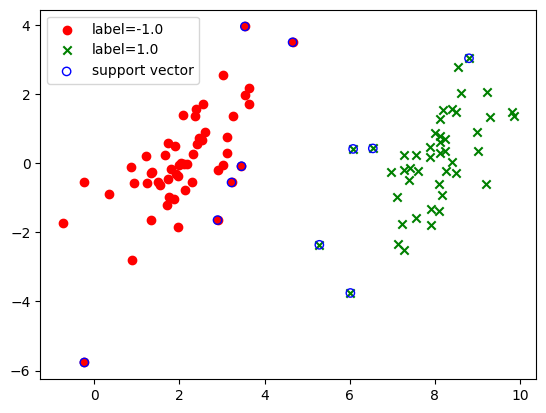

In [11]:
# 将训练数据点和支持向量绘制出来
p = plot_scatter(dataArr, labelArr, to_show=False)
p.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], marker='o', facecolor='none', edgecolors='b', label='support vector')
p.legend()
p.show()

In [13]:
# svm+RBF径向基函数
svm_rbf = svm.SVC(kernel='rbf')  # rbf
dataArr, labelArr = load_dataset('Ch06/testSetRBF.txt')
svm_rbf.fit(dataArr, labelArr)

SVC()

In [14]:
# 测试样例
test_data = np.array([[-0.25, 0], [0, -0.75]])  # 1, -1
svm_rbf.predict(test_data)

array([ 1., -1.])

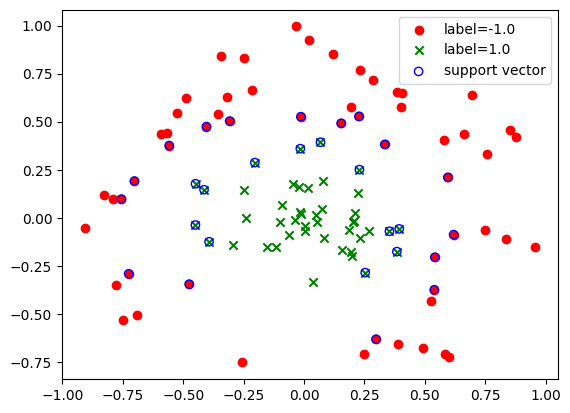

In [15]:
# 将训练数据点和支持向量绘制出来
p = plot_scatter(dataArr, labelArr, to_show=False)
p.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], marker='o', facecolor='none', edgecolors='b', label='support vector')
p.legend()
p.show()

#### 示例：手写识别问题回顾

In [17]:
import os

train_ds_path = 'Ch02/trainingDigits/'
test_ds_path = 'Ch02/testDigits/'

def get_digits_dataset(ds_path):
    file_names = os.listdir(ds_path)
    labels = []
    features = []
    def image2vector(f_path):
        v = []
        with open(f_path, 'r') as f:
            for i in range(32):
                line = f.readline().strip()
                v.extend([int(digit) for digit in list(line)])
        return v
    for f_name in file_names:
        labels.append(int(f_name.split('_')[0]))
        features.append(image2vector(os.path.join(ds_path, f_name)))
    return np.array(features), np.array(labels)

In [20]:
from sklearn import svm

train_features, train_labels = get_digits_dataset(train_ds_path)
test_features, test_labels = get_digits_dataset(test_ds_path)
# 多分类问题
svm_multi = svm.SVC(decision_function_shape='ovo')  # one-versus-one，每两个类之间训练一个svm分类器出来，n个类总共有n*(n-1)/2个分类器
svm_multi.fit(train_features, train_labels)

SVC(decision_function_shape='ovo')

In [21]:
acc = sum(svm_multi.predict(test_features) == test_labels) / len(test_labels)
print('Accuracy: ', acc)

Accuracy:  0.985200845665962


### AdaBoost算法

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

def loadSimpData():
    datMat = np.matrix(
        [[ 1. ,  2.1],
        [ 2. ,  1.1],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels

def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):#just classify the data
    retArray = np.ones((np.shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray
    
def buildStump(dataArr,classLabels,D):
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = np.inf #init error sum, to +infinity
    for i in range(n):#loop over all dimensions
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):#loop over all range in current dimension
            for inequal in ['lt', 'gt']: #go over less than and greater than
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)#call stump classify with i, j, lessThan
                errArr = np.mat(np.ones((m,1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr  #calc total error multiplied by D
                # print(f"split: dim {i}, thresh {threshVal:.2f}, thresh ineqal: {inequal}, the weighted error is {weightedError.item():.3f}")
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst

def adaBoostTrainDS(dataArr,classLabels,numIt=40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m,1))/m)   #init D to all equal
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)#build Stump
        # print("D:",D.T)
        alpha = float(0.5*np.log((1.0-error)/max(error,1e-16)))#calc alpha, throw in max(error,eps) to account for error=0
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                  #store Stump Params in Array
        # print("classEst: ",classEst.T)
        expon = np.multiply(-1*alpha*np.mat(classLabels).T,classEst) #exponent for D calc, getting messy
        D = np.multiply(D,np.exp(expon))                              #Calc New D for next iteration
        D = D/D.sum()
        #calc training error of all classifiers, if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        # print("aggClassEst: ",aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T,np.ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total error:", errorRate)
        if errorRate == 0.0: break
    return weakClassArr, aggClassEst


In [ ]:
D = np.mat(np.ones((5, 1)) / 5)
dataMat,classLabels = loadSimpData()
buildStump(dataMat, classLabels, D)

In [ ]:
adaBoostTrainDS(dataMat, classLabels)

In [2]:
def loadDataSet(fileName):
    fr = open(fileName)
    numFeat = len(fr.readline().strip().split('\t')) - 1
    dataMat = []; labelMat = []
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(i) for i in lineArr[:numFeat]])
        labelMat.append(float(lineArr[-1]))
    return dataMat,labelMat

def adaClassify(datToClass,classifierArr):
    dataMatrix = np.mat(datToClass)#do stuff similar to last aggClassEst in adaBoostTrainDS
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix,classifierArr[i]['dim'],\
                                 classifierArr[i]['thresh'],\
                                 classifierArr[i]['ineq'])#call stump classify
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return np.sign(aggClassEst)

def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0,1.0) #cursor
    ySum = 0.0 #variable to calculate AUC
    numPosClas = np.sum(np.array(classLabels)==1.0)
    yStep = 1/float(numPosClas); xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndicies = predStrengths.argsort()#get sorted index, it's reverse
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    #loop through all the values, drawing a line segment at each point
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0; delY = yStep;
        else:
            delX = xStep; delY = 0;
            ySum += cur[1]
        #draw line from cur to (cur[0]-delX,cur[1]-delY)
        ax.plot([cur[0],cur[0]-delX],[cur[1],cur[1]-delY], c='b')
        cur = (cur[0]-delX,cur[1]-delY)
    ax.plot([0,1],[0,1],'b--')
    plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    ax.axis([0,1,0,1])
    plt.show()
    print(f"the Area Under the Curve is: {ySum * xStep}")

In [ ]:
dataArr,labelArr = loadDataSet('Ch07/horseColicTraining2.txt')
# dataArr,labelArr
adaBoostTrainDS(dataArr,labelArr,10)

#### 示例：在一个难数据集上应用 AdaBoost

Start to train model [n_estimators=1]
train_error=0.2842809364548495, test_error=0.26865671641791045
Start to train model [n_estimators=10]
train_error=0.3971499399448637, test_error=0.23880597014925375
Start to train model [n_estimators=50]
train_error=0.44256171952809853, test_error=0.22388059701492535
Start to train model [n_estimators=100]
train_error=0.45603551390017233, test_error=0.25373134328358204
Start to train model [n_estimators=500]
train_error=0.47199019851065155, test_error=0.28358208955223885
Start to train model [n_estimators=1000]
train_error=0.47632974671884815, test_error=0.29850746268656714
Start to train model [n_estimators=10000]
train_error=0.49488471959536484, test_error=0.31343283582089554


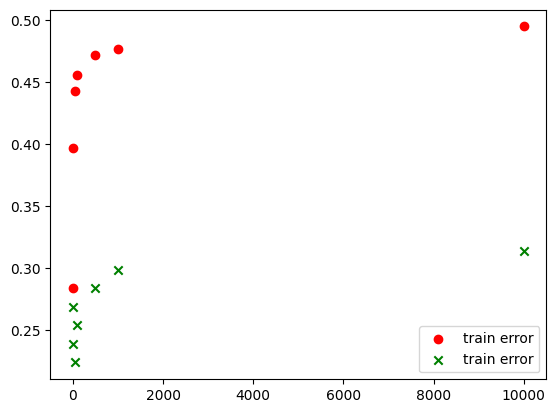

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from utils import *
import matplotlib.pyplot as plt

num_classifiers = [1, 10, 50, 100, 500, 1000, 10000]  # 使用不同数量的弱分类器数量，统计错误率
train_error_arr = np.zeros_like(num_classifiers, dtype=np.float64)
test_error_arr = np.zeros_like(num_classifiers, dtype=np.float64)
dataArr, labelArr = load_dataset('Ch07/horseColicTraining2.txt')
test_data_arr, test_label_arr = load_dataset('Ch07/horseColicTest2.txt')

for i in range(len(num_classifiers)):
    n_est = num_classifiers[i]
    adaboost_cls = AdaBoostClassifier(n_estimators=n_est)  # 默认使用decision stumps弱分类器
    print(f'Start to train model [n_estimators={n_est}]')
    adaboost_cls.fit(dataArr, labelArr)
    err = np.mean(adaboost_cls.estimator_errors_)
    # print(f'train_error={err}', end=', ')
    train_error_arr[i] = err
    err = 1 - evaluate_classifier(adaboost_cls, test_data_arr, test_label_arr)
    # print(f'test_error={err}')
    test_error_arr[i] = err

plt.scatter(num_classifiers, train_error_arr, c='r', marker='o', label='train error')
plt.scatter(num_classifiers, test_error_arr, c='g', marker='x', label='train error')
plt.legend()
plt.show()

### 回归

#### 标准线性回归

In [1]:
from utils import *

def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:  # 确认xTx的逆存在
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)  # 求最佳的w
    return ws

In [19]:
xArr, yArr = load_dataset('Ch08/ex0.txt')
ws = standRegres(xArr, yArr)
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yHat = xMat * ws

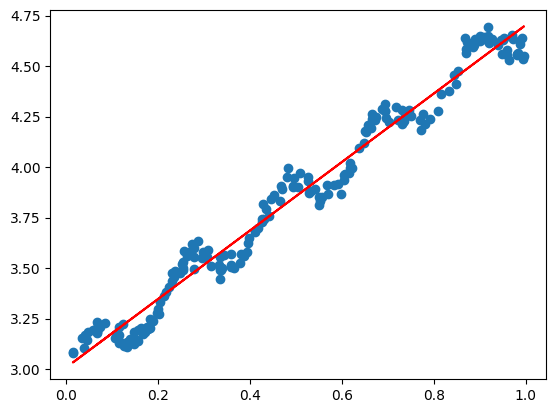

In [14]:
plt.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
plt.plot(xMat[:, 1], yHat, c='r')
plt.show()

In [4]:
np.corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [20]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):  #loops over all the data points and applies lwlr to each one
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat


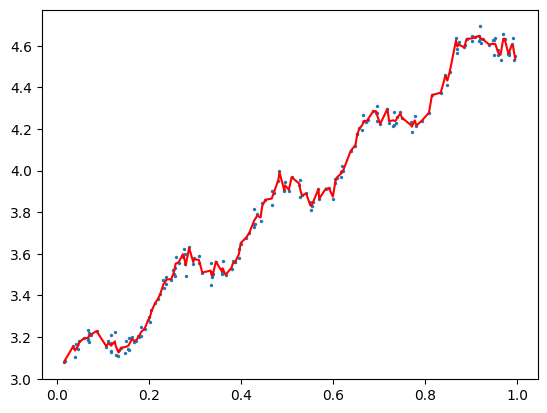

In [22]:
# k=0.003
yHat = lwlrTest(xArr, xArr, yArr, 0.003)
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]
plt.scatter(xMat[:, 1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2)
plt.plot(xSort[:, 1], yHat[srtInd], c='r')
plt.show()

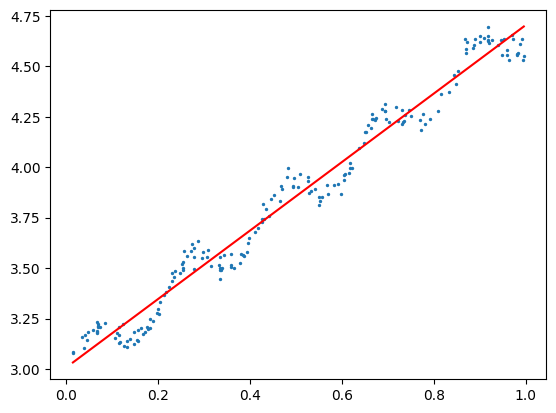

In [23]:
# k=1
yHat = lwlrTest(xArr, xArr, yArr, 1)
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]
plt.scatter(xMat[:, 1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2)
plt.plot(xSort[:, 1], yHat[srtInd], c='r')
plt.show()

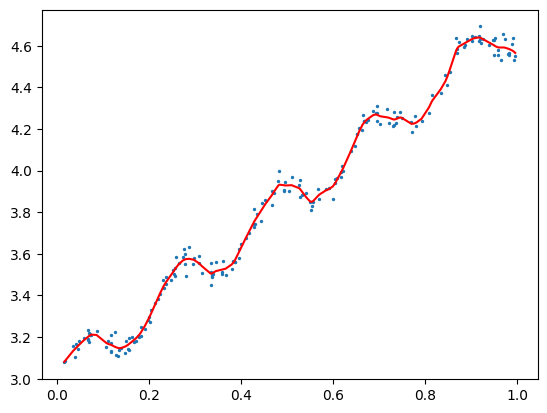

In [24]:
# k=0.01
yHat = lwlrTest(xArr, xArr, yArr, 0.01)
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]
plt.scatter(xMat[:, 1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2)
plt.plot(xSort[:, 1], yHat[srtInd], c='r')
plt.show()

#### Sklearn

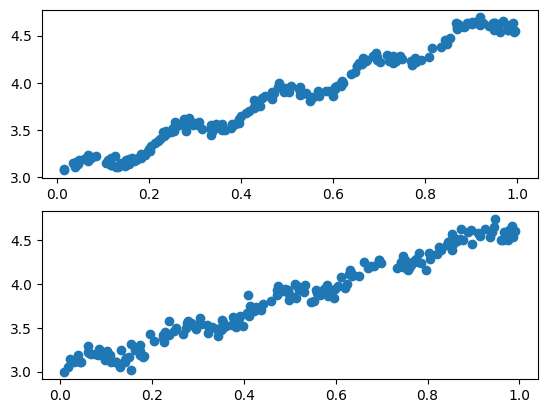

In [30]:
from utils import *

fig = plt.figure()
fig.add_axes(211)
x_arr, y_arr = load_dataset('Ch08/ex0.txt')
plt.scatter(x_arr[:, 1], y_arr)
fig.add_axes(212)
x_arr, y_arr = load_dataset('Ch08/ex1.txt')
plt.scatter(x_arr[:, 1], y_arr)
plt.show()

Coef=[0.         1.69532264]


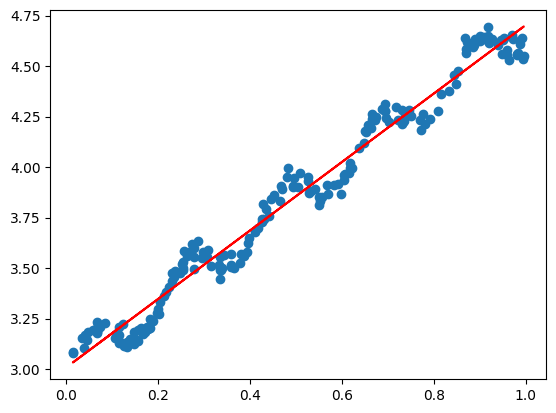

In [72]:
from sklearn.linear_model import LinearRegression

# 线性回归（最小二乘法求权重系数）
x_arr, y_arr = load_dataset('Ch08/ex0.txt')
linear_reg = LinearRegression()
linear_reg.fit(x_arr, y_arr)
print(f'Coef={linear_reg.coef_}')
y_hat = linear_reg.predict(x_arr)
plt.scatter(x_arr[:, 1], y_arr)
plt.plot(x_arr[:, 1], y_hat, c='r')
plt.show()

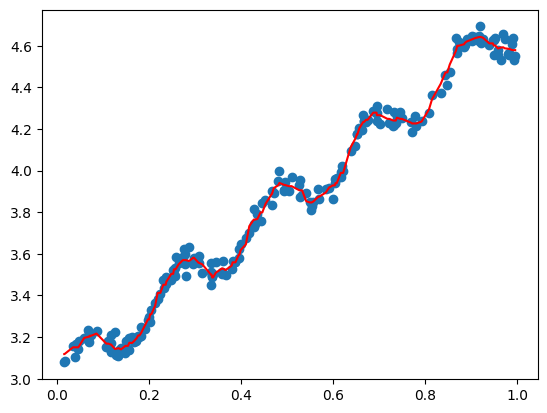

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from utils import *

# K近邻回归
x_arr, y_arr = load_dataset('Ch08/ex0.txt')
kn_reg = KNeighborsRegressor()
kn_reg.fit(x_arr, y_arr)
y_hat = kn_reg.predict(x_arr)
srtInd = x_arr[:, 1].argsort(0)
x_sort = x_arr[srtInd][:, 1]
plt.scatter(x_arr[:, 1], y_arr)
plt.plot(x_sort, y_hat[srtInd], c='r')
plt.show()

#### 示例：预测鲍鱼的年龄

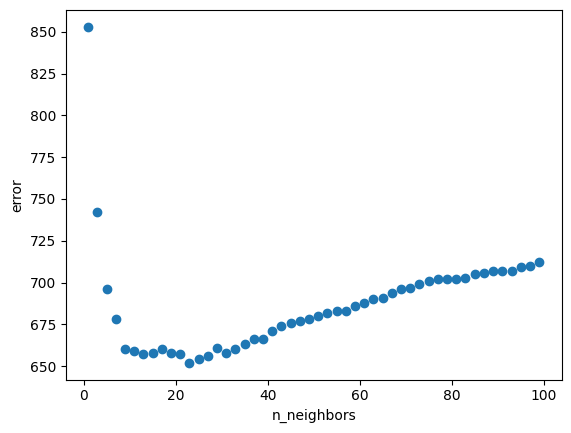

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from utils import *

def train_and_test_knreg(x_train, x_test, y_train, y_test, k):
    kn_reg = KNeighborsRegressor(n_neighbors=k)
    kn_reg.fit(x_train, y_train)
    err = np.sum(np.abs(kn_reg.predict(x_test) - y_test))
    return err

data_arr, label_arr = load_dataset('Ch08/abalone.txt')
x_train, x_test, y_train, y_test = train_test_split(data_arr, label_arr, test_size=0.1)
k_list = list(range(1, 100, 2))
err_arr = np.zeros_like(k_list)
for i in range(len(k_list)):
    k = k_list[i]
    err_arr[i] = train_and_test_knreg(x_train, x_test, y_train, y_test, k)

plt.scatter(k_list, err_arr)
plt.xlabel('n_neighbors');plt.ylabel('error')
plt.show()

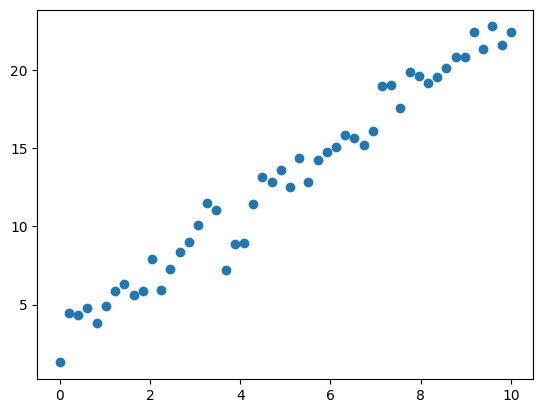

In [22]:
def generate_regression_data(min=0, max=10, sample_num=50, f=lambda x: 2*x + 3):
    x = np.linspace(min, max, sample_num)
    y = f(x) + np.random.normal(0, 1, size=sample_num)
    return x, y

x, y = generate_regression_data()
plt.scatter(x, y)

#### 岭回归

In [24]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam  # 比标准线性回归多的一步
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws
    
def ridgeTest(xArr,yArr):
    xMat = np.mat(xArr); yMat=np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean     #to eliminate X0 take mean off of Y
    #regularize X's
    xMeans = np.mean(xMat,0)   #calc mean then subtract it off
    xVar = np.var(xMat,0)      #计算方差
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,np.exp(i-10))
        wMat[i,:]=ws.T
    return wMat

In [25]:
x_arr, y_arr = load_dataset('Ch08/abalone.txt')
ridgeW = ridgeTest(x_arr, y_arr)

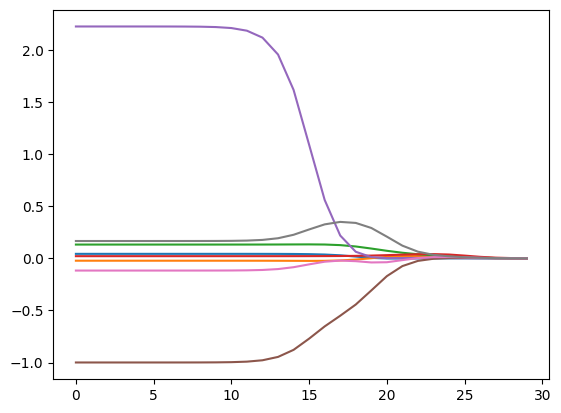

In [27]:
plt.plot(ridgeW)

#### Sklearn

In [2]:
from sklearn.linear_model import Ridge
from utils import *

In [3]:
x_arr, y_arr = load_dataset('Ch08/abalone.txt')
reg = Ridge()
reg.fit(x_arr, y_arr)


Ridge()

### 树回归

#### 回归树

In [2]:
from utils import *

def loadDataSet(f_name):
    x_arr, y_arr = load_dataset(f_name)
    return np.concatenate([x_arr, y_arr[:, None]], axis=1)

def binSplitDataSet(dataSet, feature, value):
    arr1 = dataSet[np.where(dataSet[:, feature] > value)]
    arr2 = dataSet[np.where(dataSet[:, feature] <= value)]
    return arr1, arr2

def regLeaf(dataSet):#returns the value used for each leaf
    return np.mean(dataSet[:,-1])

def regErr(dataSet):
    return np.var(dataSet[:,-1]) * np.shape(dataSet)[0]

def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(1,4)):
    tolS = ops[0]; tolN = ops[1]
    #if all the target variables are the same value: quit and return value
    if len(set(dataSet[:, -1])) == 1: #exit cond 1
        return None, leafType(dataSet)
    m,n = np.shape(dataSet)
    #the choice of the best feature is driven by Reduction in RSS error from mean
    S = errType(dataSet)  # 整个数据集的总方差
    bestS = np.inf; bestIndex = 0; bestValue = 0
    for featIndex in range(n - 1):  # 遍历每一个特征列
        for splitVal in set(dataSet[:,featIndex]):  # 遍历一个特征列中所有的不同元素
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)
            if (np.shape(mat0)[0] < tolN) or (np.shape(mat1)[0] < tolN): continue  # 划分时两部分元素个数必须都不少于ops[1]
            newS = errType(mat0) + errType(mat1)  # 计算两部分的数据的总方差之和
            if newS < bestS:  # 更新最佳划分方案
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    #if the decrease (S-bestS) is less than a threshold don't do the split
    if (S - bestS) < tolS:  # 最佳的划分方案的总方差比所有数据的总方差只少了ops[0]（是否划分的阈值设定）以内时，不划分数据集
        return None, leafType(dataSet) #exit cond 2
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    if (np.shape(mat0)[0] < tolN) or (np.shape(mat1)[0] < tolN):  #exit cond 3
        return None, leafType(dataSet)
    return bestIndex,bestValue#returns the best feature to split on
                              #and the value used for that split

def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(1,4)):#assume dataSet is NumPy Mat so we can array filtering
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)#choose the best split
    if feat == None: return val #if the splitting hit a stop condition return val
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    lSet, rSet = binSplitDataSet(dataSet, feat, val)
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree  

def isTree(obj):
    return (type(obj).__name__=='dict')  # float则为叶子结点，dict则为树

def getMean(tree):  # 将tree结点的子结点合并（剪枝），并返回该树的均值
    if isTree(tree['right']): tree['right'] = getMean(tree['right'])  # 递归剪枝
    if isTree(tree['left']): tree['left'] = getMean(tree['left'])
    return (tree['left']+tree['right'])/2.0
    
def prune(tree, testData):
    if np.shape(testData)[0] == 0: return getMean(tree)  # 没有测试数据则将整个树进行剪枝
    if (isTree(tree['right']) or isTree(tree['left'])):  #if the branches are not trees try to prune them
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
    if isTree(tree['left']): tree['left'] = prune(tree['left'], lSet)
    if isTree(tree['right']): tree['right'] =  prune(tree['right'], rSet)
    #if they are now both leafs, see if we can merge them
    if not isTree(tree['left']) and not isTree(tree['right']):  # 到达叶子结点
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])  # 根据叶子结点的值划分测试集，判断是否发生过拟合
        errorNoMerge = sum(np.power(lSet[:,-1] - tree['left'],2)) +\
            np.sum(np.power(rSet[:,-1] - tree['right'],2))  # 求未合并时在测试集的总方差
        treeMean = (tree['left']+tree['right'])/2.0
        errorMerge = np.sum(np.power(testData[:,-1] - treeMean,2))  # 合并后的总方差
        if errorMerge < errorNoMerge: 
            print("merging")
            return treeMean  # 返回合并后的总方差（剪枝）
        else: return tree
    else: return tree

In [6]:
data_arr = loadDataSet('Ch09/ex2.txt')
# plot_scatter(data_arr)
createTree(data_arr)

{'spInd': 0,
 'spVal': 0.499171,
 'left': {'spInd': 0,
  'spVal': 0.729397,
  'left': {'spInd': 0,
   'spVal': 0.952833,
   'left': {'spInd': 0,
    'spVal': 0.958512,
    'left': 105.24862350000001,
    'right': 112.42895575000001},
   'right': {'spInd': 0,
    'spVal': 0.759504,
    'left': {'spInd': 0,
     'spVal': 0.790312,
     'left': {'spInd': 0,
      'spVal': 0.833026,
      'left': {'spInd': 0,
       'spVal': 0.944221,
       'left': 87.3103875,
       'right': {'spInd': 0,
        'spVal': 0.85497,
        'left': {'spInd': 0,
         'spVal': 0.910975,
         'left': 96.452867,
         'right': {'spInd': 0,
          'spVal': 0.892999,
          'left': 104.825409,
          'right': {'spInd': 0,
           'spVal': 0.872883,
           'left': 95.181793,
           'right': 102.25234449999999}}},
        'right': 95.27584316666666}},
      'right': {'spInd': 0,
       'spVal': 0.811602,
       'left': 81.110152,
       'right': 88.78449880000001}},
     'right': 102.

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\pytorch\\lib\\site-packages\\matplotlib\\pyplot.py'>

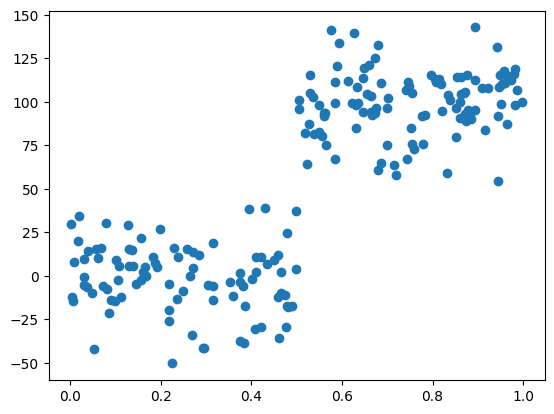

In [4]:
myArr2 = loadDataSet('Ch09/ex2.txt')
myTree = createTree(myArr2, ops=(0, 1))  # 自定义参数，使模型过拟合
myArr2Test = loadDataSet('Ch09/ex2test.txt')
# prune(myTree, myArr2Test)
plot_scatter(myArr2Test)

#### 模型树

In [8]:
def linearSolve(dataSet):   #helper function used in two places
    m,n = np.shape(dataSet)
    X = np.mat(np.ones((m,n))); Y = np.mat(np.ones((m,1)))#create a copy of data with 1 in 0th postion
    X[:,1:n] = dataSet[:,0:n-1]; Y = dataSet[:,-1]#and strip out Y
    xTx = X.T*X
    if np.linalg.det(xTx) == 0.0:
        raise NameError('This matrix is singular, cannot do inverse,\n\
        try increasing the second value of ops')
    # print(xTx.I, X.T)
    ws = xTx.I * (X.T * Y[:, None])
    return ws,X,Y

def modelLeaf(dataSet):#create linear model and return coeficients
    ws,X,Y = linearSolve(dataSet)
    return ws

def modelErr(dataSet):
    ws,X,Y = linearSolve(dataSet)
    yHat = X * ws
    return np.sum(np.power(Y - yHat,2))


In [10]:
myArr2 = loadDataSet('Ch09/ex2.txt')
createTree(myArr2, modelLeaf, modelErr, (1, 10))

{'spInd': 0,
 'spVal': 0.499171,
 'left': {'spInd': 0,
  'spVal': 0.731636,
  'left': {'spInd': 0,
   'spVal': 0.85497,
   'left': {'spInd': 0,
    'spVal': 0.944221,
    'left': matrix([[20.34861054],
            [84.81791554]]),
    'right': {'spInd': 0,
     'spVal': 0.901421,
     'left': matrix([[49.37651516],
             [53.53859299]]),
     'right': matrix([[144.12072909],
             [-49.32020732]])}},
   'right': {'spInd': 0,
    'spVal': 0.811602,
    'left': matrix([[26.51947741],
            [75.47836008]]),
    'right': matrix([[-33.14158643],
            [161.42135348]])}},
  'right': {'spInd': 0,
   'spVal': 0.623909,
   'left': {'spInd': 0,
    'spVal': 0.665329,
    'left': matrix([[ 195.08593777],
            [-125.38307502]]),
    'right': matrix([[-159.86941107],
            [ 414.40448581]])},
   'right': {'spInd': 0,
    'spVal': 0.560301,
    'left': matrix([[163.03758282],
            [-91.33937333]]),
    'right': matrix([[95.65296121],
            [18.3792

#### Sklearn

error: 4237.234961833333


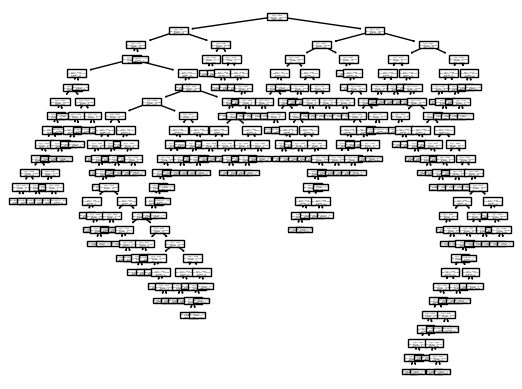

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from utils import *

# 回归树
train_data = loadDataSet('Ch09/ex2.txt')
test_data = loadDataSet('Ch09/ex2test.txt')
tree_reg = DecisionTreeRegressor(ccp_alpha=0.1,  # ccp_alpha是一个正则化参数，用于控制剪枝的程度
                                 min_samples_split=2, # 节点再划分所需的最小样本数
                                )
tree_reg.fit(train_data[:, 0].reshape(-1, 1), train_data[:, 1])
_ = tree.plot_tree(tree_reg)
err = evaluate_regressor(tree_reg, test_data[:, 0].reshape(-1, 1), test_data[:, 1])
print('error:', err)

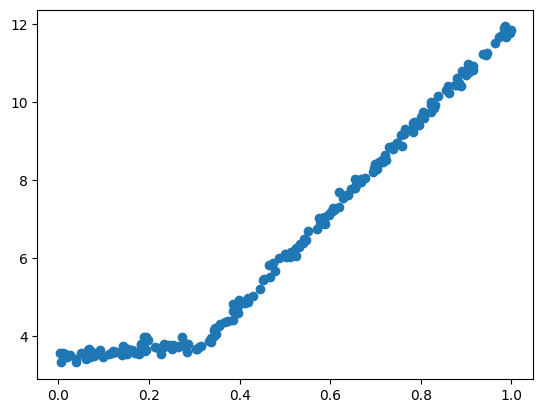

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_arr = loadDataSet('Ch09/exp2.txt')
plot_scatter(data_arr)
x_train, x_test, y_train, y_test = train_test_split(data_arr[:, 0].reshape(-1, 1), data_arr[:, 1], test_size=0.1)

In [24]:
# 模型树
model_tree_reg = DecisionTreeRegressor()
model_tree_reg.fit(x_train, y_train)
y_pred = model_tree_reg.predict(x_test)
err = mean_squared_error(y_test, y_pred)
print(f'error={err}')

0.02619401051905005

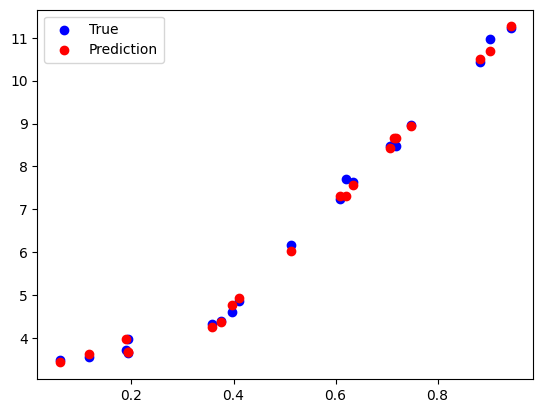

In [25]:
# 画图
plt.scatter(x_test, y_test, c='b', label='True')
plt.scatter(x_test, y_pred, c='r', label='Prediction')
plt.legend()
plt.show()

### 无监督学习

### K-means

In [12]:
from utils import *

def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))  # SSE（均方误差）

def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k, 1))  # [0, 1)均匀分布
    return centroids  # 生成[min, max)之间的均匀分布

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0)  # 求数据点的质心（求均值）
    return centroids, clusterAssment


In [13]:
data_arr = load_dataset('Ch10/testSet.txt', concat=True)
dataMat = np.mat(data_arr)
# min(dataMat[:, 0])
# randCent(dataMat, 2)
distEclud(dataMat[0], dataMat[1])

5.184632816681332

#### Sklearn

d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


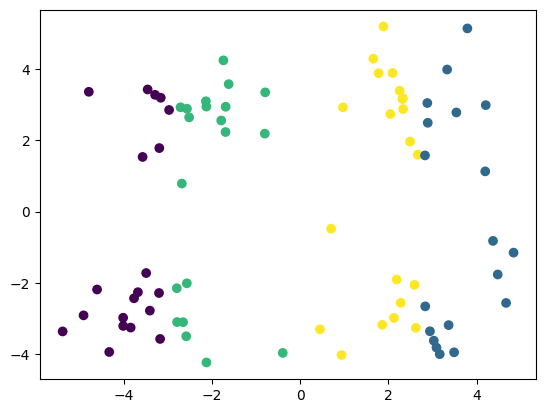

In [29]:
from sklearn.cluster import KMeans
from utils import *
x_arr, y_arr = load_dataset('Ch10/testSet.txt')
# plot_scatter(data_arr)
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(x_arr, y_arr)
plt.scatter(x_arr, y_arr, c=y_pred)

## 尚硅谷-谷粒学苑资料压缩包处理脚本

In [2]:

import zipfile
import os

def unzip_file(f_path, print_info=True):
    f_without_ext, _ = os.path.splitext(f_path)
    os.makedirs(f_without_ext, exist_ok=True)
    with zipfile.ZipFile(f_path, 'r', compresslevel=2) as par_zip:
        par_zip.extractall(f_without_ext)
    if print_info:
        print(f'extract to {f_without_ext}')
    return f_without_ext

def rename_file_ziw2zip(ziw_f_path, unzip=True):
    f_without_ext, _ = os.path.splitext(ziw_f_path)
    zip_f_path = f_without_ext + '.zip'
    os.rename(ziw_f_path, zip_f_path)
    if unzip: 
        unzip_file(zip_f_path)

def cvt_all_ziw_file(ch_dir):
    for ch1_name in os.listdir(ch_dir):
                if '项目' in ch1_name:
                    ch1_dir = os.path.join(ch_dir, ch1_name)
                    for ch2_name in os.listdir(ch1_dir):
                        ch2_dir = os.path.join(ch1_dir, ch2_name)
                        for ziw_f_name in os.listdir(ch2_dir):
                            ziw_f_path = os.path.join(ch2_dir, ziw_f_name)
                            rename_file_ziw2zip(ziw_f_path)
                    break

def unzip_and_cvt_all_notebooks(par_zip_path):
    f_path_without_ext = unzip_file(par_zip_path)
    for day in os.listdir(f_path_without_ext):
        day_dir = os.path.join(f_path_without_ext, day)
        
        for ch_zip_name in os.listdir(day_dir):
            ch_dir = unzip_file(os.path.join(day_dir, ch_zip_name))
            cvt_all_ziw_file(ch_dir)
            

In [5]:
def cvt_all_ziw_files(ch_dir):
    for ch_name in os.listdir(ch_dir):
        ch_path = os.path.join(ch_dir, ch_name)
        if os.path.isdir(ch_path):
            cvt_all_ziw_files(ch_path)
        else:
            if os.path.splitext(ch_path)[1] == '.ziw':
                rename_file_ziw2zip(ch_path)

ch_dir = 'D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02'
cvt_all_ziw_files(ch_dir)


extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\1 项目环境搭建\01-数据库设计
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\1 项目环境搭建\02-搭建项目工程（父工程）
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\1 项目环境搭建\03-搭建项目工程（service模块）
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\2 讲师管理接口开发\01-讲师管理模块配置和生成代码
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\2 讲师管理接口开发\02-配置Swagger2生成API接口文档
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\2 讲师管理接口开发\03-统一返回结果对象
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\2 讲师管理接口开发\04-分页和条件查询接口开发
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\2 讲师管理接口开发\05-新增和修改讲师接口开发
extract to D:\MyProject\WebProject\谷粒学苑\项目笔记课件\day02\day02笔记\day02项目【环境搭建和讲师管理接口开发】\2 讲师管理接口开发\07-统一异常处理
extract to D:\

In [14]:
def unzip_file(f_path, print_info=True):
    f_without_ext, _ = os.path.splitext(f_path)
    os.makedirs(f_without_ext, exist_ok=True)
    with zipfile.ZipFile(f_path, 'r', compresslevel=2) as par_zip:
        par_zip.extractall(f_without_ext)
    if print_info:
        print(f'extract to {f_without_ext}')
    return f_without_ext

unzip_file('D:/MyProject/WebProject/谷粒学苑/项目笔记课件.zip', 'D:/MyProject/WebProject/谷粒学苑/项目笔记课件')

extract to D:/MyProject/WebProject/谷粒学苑/项目笔记课件


'D:/MyProject/WebProject/谷粒学苑/项目笔记课件'

In [12]:
import zipfile
import os

def unzip_file(zip_file_path, extract_folder):
    # 创建目标文件夹
    os.makedirs(extract_folder, exist_ok=True)
    # 打开.zip文件
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # 遍历.zip文件中的所有文件
        for file_info in zip_ref.infolist():
            file_name = file_info.filename.encode('cp437', errors='replace').decode('utf-8')
            file_path = os.path.join(extract_folder, file_name)

            # 如果是文件夹，递归解压
            if file_name.endswith('/'):
                os.makedirs(file_path, exist_ok=True)
            else:
                # 如果是文件，解压到目标文件夹
                with zip_ref.open(file_info) as source, open(file_path, 'wb') as dest:
                    dest.write(source.read())
                # 如果是.zip文件，递归解压
                if file_name.endswith('.zip'):
                    unzip_file(file_path, os.path.join(extract_folder, os.path.splitext(file_name)[0]))

unzip_file('D:/MyProject/WebProject/谷粒学苑/项目笔记课件.zip', 'D:/MyProject/WebProject/谷粒学苑/项目笔记课件')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 11: invalid start byte